# Binning and Binarization | Discretization | Quantile Binning | KMeans Binning

### Encoding Numerical Features
    Numerical to Categorical
        1. Discretization(Binning)
        2. Binarization

Discretization is the process of transforming continuous variables into discrete
variables by creating a set of contiguous intervals that span the range of the
variable's values. Discretization is also called binning, where bin is an alternative
name for interval.

  Why use Discretization:
    1. To handle Outliers
    2. To improve the value spread
  Types of Discretization:
  1. Unsupervised binning
      1. Equal Width(Uniform)
      2. Equal Frequency(Quantile)
      3. k mean binning
  2. Supervised binning
      1. Decision tree binning
  3. Custom binning

# DISCRETIZATION

Discretization = converting continuous numeric data into discrete categories (bins).

Uses:
- Reduces noise
- Improves model performance (Naive Bayes, Logistic Regression)
- Makes data easier to interpret

------------------------------------------
1) UNSUPERVISED BINNING (No Target Used)
------------------------------------------

1.1 Equal Width Binning (Uniform Binning)
-----------------------------------------
Definition:
Divide the range of the feature into 'k' bins of equal size.

Formula:
Bin Width = (max - min) / k

Example:
Data = [10, 11, 14, 19, 22, 25, 27]
k = 3
Range = 27 - 10 = 17
Width = 17/3 = 5.67

Bins:
Bin1: 10 – 15.67
Bin2: 15.67 – 21.34
Bin3: 21.34 – 27

Pros:
- Very simple
- Outliers handling
- Equal bins

Cons:
- Bins may have uneven data
- Outliers distort bins

1.2 Equal Frequency Binning (Quantile Binning)
----------------------------------------------
Definition:
Each bin contains roughly the same number of data points.

Example:
Data = [1, 3, 4, 9, 11, 14, 16, 22]
k = 4
Each bin = 2 values

Bins:
Bin1: 1, 3
Bin2: 4, 9
Bin3: 11, 14
Bin4: 16, 22

Example 2:- Intervals = 10-

Each interval contains 10% of
total observations

Intervals: T
0-16; 16-20; 20-22; 22-25; .
50-74


Pros:
- Best for skewed data
- No empty bins

Cons:
- Unequal bin width → may lose numeric meaning

1.3 K-Means Binning
--------------------
Definition:
Use K-Means clustering on a single feature.
Cluster centers = bin centers.

Example:
Data = [2, 3, 5, 45, 47, 50]
k = 2

Clusters:
Cluster1 → small values → Bin1
Cluster2 → large values → Bin2

Pros:
- Captures natural grouping
- Good for complex distributions

Cons:
- Random initialization impacts result
- Slower than simple binning

------------------------------------------
2) SUPERVISED BINNING (Uses Target Variable)
------------------------------------------

2.1 Decision Tree Binning
-------------------------
Definition:
Use a decision tree to find split points that best separate the target classes.

Example:
Feature: Age
Target: Buy (0/1)

Decision tree may choose:
Age <= 25 → Bin1
Age > 25 → Bin2

Pros:
- Very accurate since it uses target variable
- Useful for Logistic Regression, XGBoost

Cons:
- If not controlled, can overfit

------------------------------------------
3) CUSTOM BINNING
------------------------------------------
Definition:
Bins created manually using domain knowledge.

Examples:
Age:
0–12 → Child
13–19 → Teen
20–40 → Adult
40+  → Senior

Income:
<25k → Low
25–75k → Middle
>75k → High

Pros:
- Best interpretability
- Follows business logic

Cons:
- Not data-driven
- May be biased

------------------------------------------
SUMMARY TABLE
------------------------------------------

Method               | Target? | Best For                    | Weakness
---------------------|---------|-----------------------------|---------
Equal Width          | No      | Simple data                 | Affected by outliers
Equal Frequency      | No      | Skewed data                 | Unequal bin width
K-Means Binning      | No      | Complex natural clusters    | Computational cost
Decision Tree Binning| Yes     | High accuracy feature engineering | May overfit
Custom Binning       | No      | Business/domain rules       | Not automatic


# ENCODING THE DISCRETIZED VARIABLE (WITH KBinsDiscretizer – sklearn)

Discretization = Converting continuous numeric values into categories (bins).

In sklearn, we use:
    from sklearn.preprocessing import KBinsDiscretizer

It performs TWO tasks:
1) Discretization: Assigns each value to a bin → (0, 1, 2,..., k-1)
2) Encoding: Represents these bins as ordinal or one-hot vectors

----------------------------------------------------------------------
1. n_bins (k)
----------------------------------------------------------------------
- n_bins = number of bins to divide the data into.
- Example:
    n_bins = 4 → bins = 0, 1, 2, 3
- You can give:
    n_bins = 4                     → same bins for all features
    n_bins = [3, 5]               → different bins per feature

----------------------------------------------------------------------
2. strategy (How bins are created)
----------------------------------------------------------------------

There are 3 strategies:

-----------------------------------------------------
2.1 strategy = 'uniform'      (Equal Width Binning)
-----------------------------------------------------
- Entire range is divided into equal-width intervals.
- Formula:
      BinWidth = (max - min) / n_bins
- All bins have the SAME width.
- Good when data is evenly spread.

Example with 3 bins:
[0-10), [10-20), [20-30)

Pros:
- Very simple to understand.

Cons:
- If data is skewed → some bins may be empty.

-----------------------------------------------------
2.2 strategy = 'quantile'     (Equal Frequency Binning)
-----------------------------------------------------
- Each bin contains approximately the SAME NUMBER of samples.
- Uses quantiles (25%, 50%, 75%, etc.).
- Good for skewed data.

Example:
Data: 100 values, n_bins=4 → each bin ≈ 25 values

Pros:
- Each bin balanced.
- No empty bins.

Cons:
- Bin width is uneven.

-----------------------------------------------------
2.3 strategy = 'kmeans'       (K-Means Clustering Binning)
-----------------------------------------------------
- Runs K-Means on the values.
- Cluster centers act as bin centers.
- Values assigned to nearest cluster → bins.

Pros:
- Captures natural groupings in data.

Cons:
- Slowest method.
- Random initialization affects result.

----------------------------------------------------------------------
3. encode (How to encode bin labels)
----------------------------------------------------------------------

After discretization, we get integers 0,1,2,... which represent bins.

We can encode these integers in different forms:

-----------------------------------------------------
3.1 encode = 'ordinal'
-----------------------------------------------------
- Each bin is shown as an integer:
      Bin0 → 0
      Bin1 → 1
      Bin2 → 2
- Output shape = (n_samples, n_features)

Pros:
- Very simple, compact (1 column).
- Good for tree-based models (DecisionTree, RandomForest, XGBoost).

Cons:
- Implies artificial order → linear models may misinterpret difference.

-----------------------------------------------------
3.2 encode = 'onehot'
-----------------------------------------------------
- Converts bins into sparse one-hot encoded vectors.
- Example with 3 bins:
      Bin0 → [1, 0, 0]
      Bin1 → [0, 1, 0]
      Bin2 → [0, 0, 1]
- Output = sparse matrix

Pros:
- No artificial order.
- Good for linear models + KNN.

Cons:
- More columns (high dimensional).

-----------------------------------------------------
3.3 encode = 'onehot-dense'
-----------------------------------------------------
- Same as onehot, but returns a DENSE numpy array.
- Good for small datasets.

----------------------------------------------------------------------
4. SUMMARY TABLE (Very important for exam)
----------------------------------------------------------------------

Parameter     | Purpose
--------------|-----------------------------------------
n_bins        | Number of bins (k)
strategy      | How bins are formed (uniform, quantile, kmeans)
encode        | How to encode the resulting bin labels

Strategy      | Meaning                | Best For
--------------|------------------------|----------------------
uniform       | Equal width            | Evenly spread data
quantile      | Equal frequency        | Skewed data
kmeans        | Cluster-based bins     | Multi-modal data

Encode        | Meaning                | Use Case
--------------|------------------------|----------------------
ordinal       | 0,1,2,…                | Tree models
onehot        | Sparse 1-hot vectors   | Linear/KNN models
onehot-dense  | Dense 1-hot vectors    | Small datasets

----------------------------------------------------------------------
5. COMPLETE EXAMPLE
----------------------------------------------------------------------

from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

X = np.array([[1.0],
              [2.5],
              [3.7],
              [4.0],
              [6.2],
              [8.9],
              [9.5]])

# 1) Uniform + Ordinal
disc1 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X1 = disc1.fit_transform(X)

# 2) Quantile + Ordinal
disc2 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
X2 = disc2.fit_transform(X)

# 3) KMeans + Ordinal
disc3 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
X3 = disc3.fit_transform(X)

# 4) Uniform + OneHotDense
disc4 = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
X4 = disc4.fit_transform(X)

----------------------------------------------------------------------
6. Final Key Points
----------------------------------------------------------------------

- Discretization → converting continuous values to bins.
- KBinsDiscretizer = discretization + encoding.
- Strategies:
      uniform  → equal width
      quantile → equal frequency
      kmeans   → cluster-based
- Encoding:
      ordinal → single integer (0,1,2)
      onehot → sparse matrix
      onehot-dense → dense array

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer



In [ ]:
df = pd.read_csv('train.csv', usecols=['Age' ,'Fare' ,'Survived' ])
df.dropna(inplace=True)
df.shape

(714, 3)

In [ ]:
x = df.iloc[ : , 1:]
y = df.iloc[:, 0]

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(), x,y, cv=10, scoring='accuracy'))

np.float64(0.6260954616588419)

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

trf = ColumnTransformer([
('first',kbin_age, [0]),
('second',kbin_fare, [1])])

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

trf.named_transformers_['first'].n_bins_

array([10])

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
'age' :X_train['Age' ],
'age_trf':X_train_trf[:,0],
'fare':X_train['Fare'],
'fare_trf':X_train_trf[ :,1]})

output['age_labels'] = pd.cut(x=X_train['Age'],
bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
874,28.0,4.0,24.00,5.0,"(25.0, 28.5]","(15.75, 26.0]"
288,42.0,8.0,13.00,4.0,"(36.0, 42.0]","(9.225, 13.0]"
543,32.0,6.0,26.00,6.0,"(28.5, 32.0]","(15.75, 26.0]"
635,28.0,4.0,13.00,4.0,"(25.0, 28.5]","(9.225, 13.0]"
785,25.0,4.0,7.25,0.0,"(22.0, 25.0]","(0.0, 7.75]"


In [ ]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

0.6303012519561815


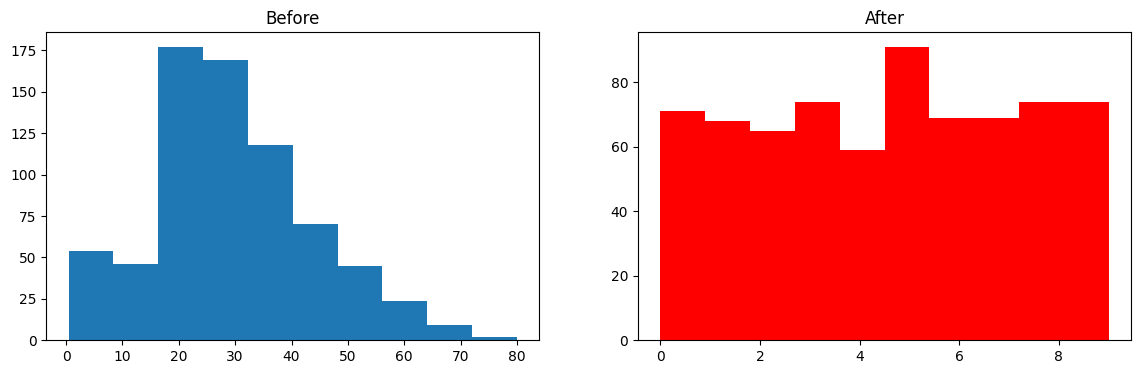

In [ ]:
discretize(10, 'quantile')

0.6288732394366197


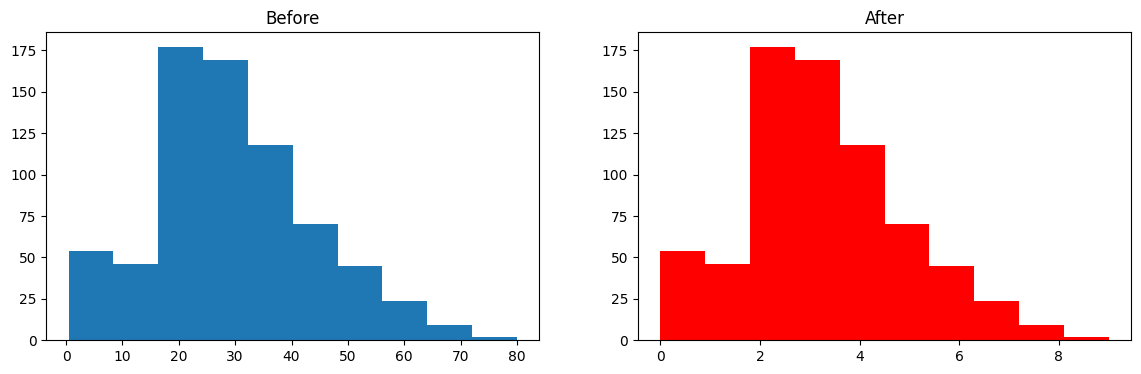

0.6289123630672926


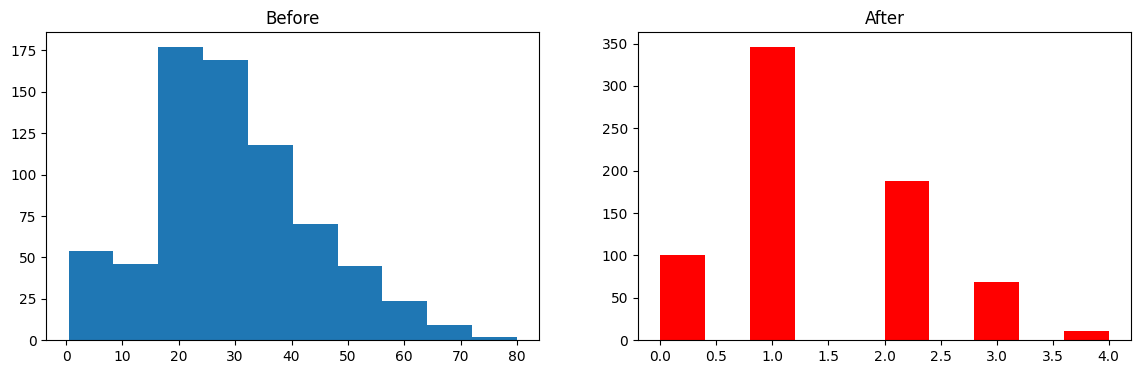

0.6345070422535211


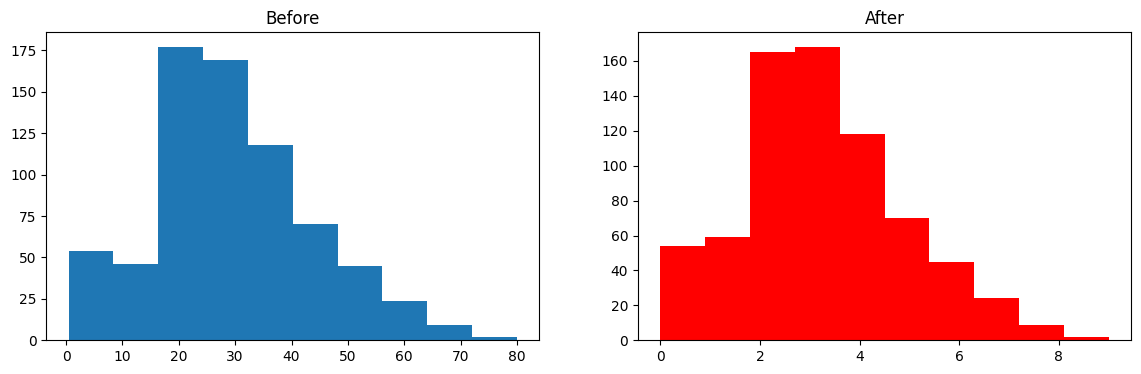

0.6400430359937402


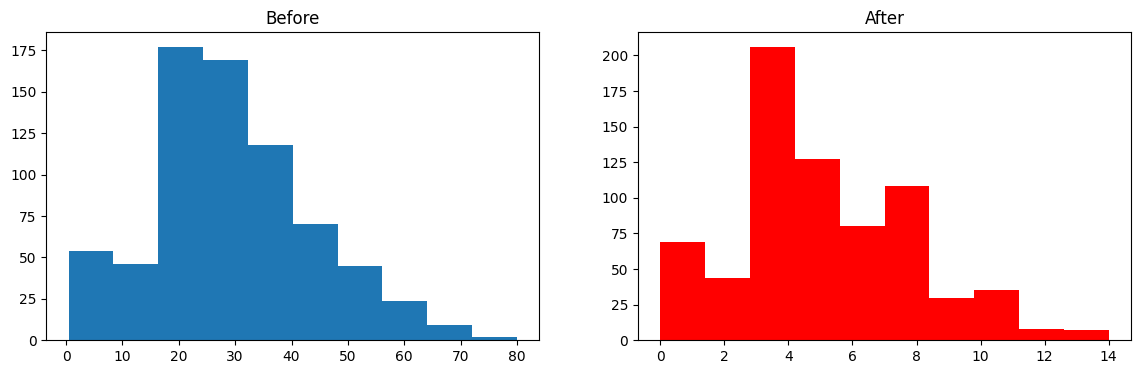

In [ ]:
discretize(10, 'uniform')
discretize(5, 'uniform')
discretize(10, 'kmeans')
discretize(15, 'kmeans')

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

df = pd.read_csv('train.csv') [['Age' ,'Fare','SibSp','Parch','Survived']]

df.dropna(inplace=True)

df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [ ]:
df['family'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived' ]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Without binarization
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [ ]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

trf = ColumnTransformer([
('bin', Binarizer(copy=False), ['family'])
],remainder='passthrough' )

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

pd.DataFrame(X_train_trf, columns=[ 'family', 'Age', 'Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
accuracy_score(y_test,y_pred2)
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6276017214397496)